<a href="https://colab.research.google.com/github/ishma-cybsec/ai-1/blob/main/stock_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3100102357.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2025-10-25")
[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.2028
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0121
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0078
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0048
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0041
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0042
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0040
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0038
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0035
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0034
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0036
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0031
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0033
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0032
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0032
Epoch 16/20
16/

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


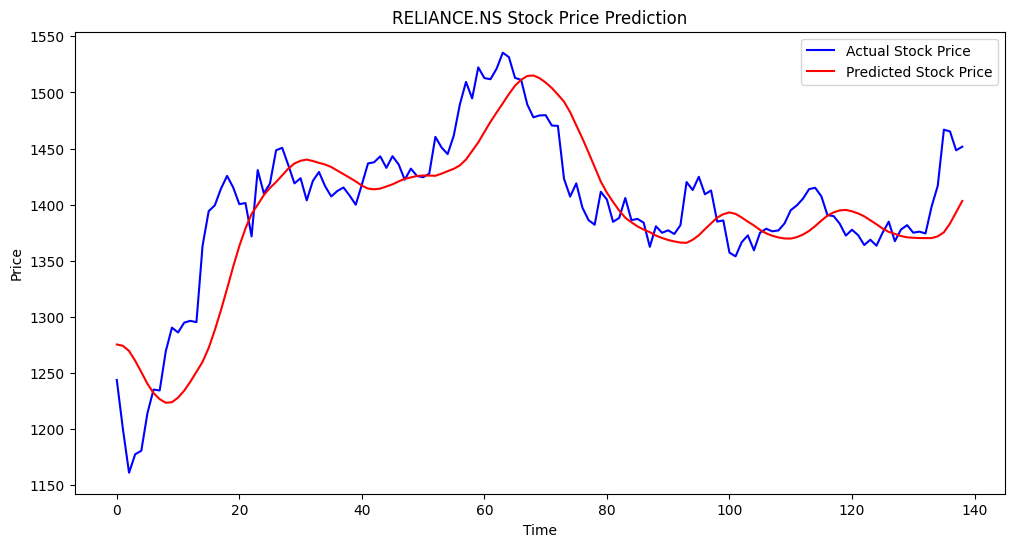

In [5]:
# Stock Price Predictor using LSTM (Online Version)
# Works on Google Colab, Replit, or any online Python compiler
# Author: Katsuo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf

# -----------------------------
# 1. Download stock data
# -----------------------------
ticker = "RELIANCE.NS"  # Change to any stock ticker
data = yf.download(ticker, start="2023-01-01", end="2025-10-25")
data = data[['Close']]
dataset = data.values.astype('float32')

# -----------------------------
# 2. Scale data
# -----------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# -----------------------------
# 3. Prepare training data
# -----------------------------
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# -----------------------------
# 4. Build LSTM model
# -----------------------------
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# -----------------------------
# 5. Train model
# -----------------------------
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# -----------------------------
# 6. Prepare test data
# -----------------------------
test_data = scaled_data[train_size-60:]
x_test, y_test = [], dataset[train_size:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# -----------------------------
# 7. Make predictions
# -----------------------------
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# -----------------------------
# 8. Visualize results
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()